<a href="https://colab.research.google.com/github/Mario-RJunior/olist-e-commerce/blob/master/outliers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos outliers

## 1) Introdução

Neste notebook faremos uma análise mais específica dos outliers da base de dados da Olist. Esta é uma continuação do trabalho de segmentação de clientes que pode ser visto [aqui](https://github.com/Mario-RJunior/olist-e-commerce/blob/master/segmentation.ipynb).

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! git clone https://github.com/Mario-RJunior/olist-e-commerce

Cloning into 'olist-e-commerce'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 263 (delta 51), reused 0 (delta 0), pack-reused 181
Receiving objects: 100% (263/263), 26.18 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [3]:
df = pd.read_csv('olist-e-commerce/outliers.csv')
df.head()

customer_unique_id  recency  R  ...  M  score  RFM_level
0  0005e1862207bf6ccc02e4228effd9a0      548  0  ...  0      0       Ruim
1  000fbf0473c10fc1ab6f8d2d286ce20c       39  4  ...  1      7      Ótimo
2  0011805441c0d1b68b48002f1d005526      497  0  ...  1      1       Ruim
3  0011857aff0e5871ce5eb429f21cdaf5      432  1  ...  1      2    Regular
4  0028a7d8db7b0247652509358ad8d755      264  2  ...  1      3    Regular

[5 rows x 9 columns]

In [4]:
df.shape

(9541, 9)

In [5]:
df.describe()

recency            R  ...            M        score
count  9541.000000  9541.000000  ...  9541.000000  9541.000000
mean    283.694791     1.992034  ...     1.425427     3.930406
std     174.812672     1.423794  ...     0.738446     1.979766
min       1.000000     0.000000  ...     0.000000     0.000000
25%     131.000000     1.000000  ...     1.000000     2.000000
50%     273.000000     2.000000  ...     1.000000     4.000000
75%     426.000000     3.000000  ...     2.000000     5.000000
max     729.000000     4.000000  ...     4.000000    12.000000

[8 rows x 7 columns]

## 2) Exibindo os dados graficamente

- Pairplot

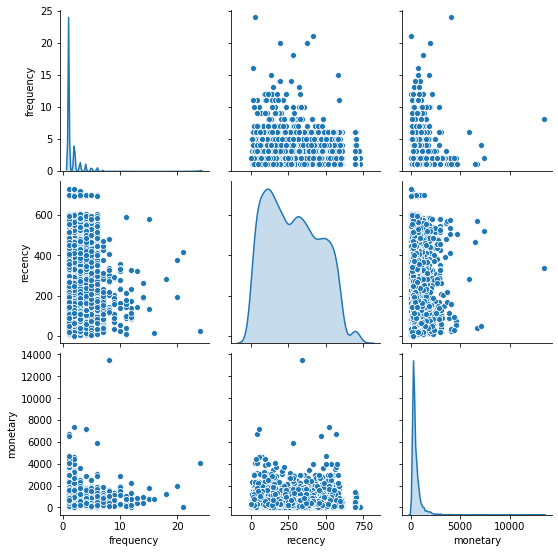

In [6]:
# Plotando um pairplot
colunas = df[['frequency', 'recency', 'monetary']]
sns.pairplot(data=colunas, diag_kind='kde')
plt.show()

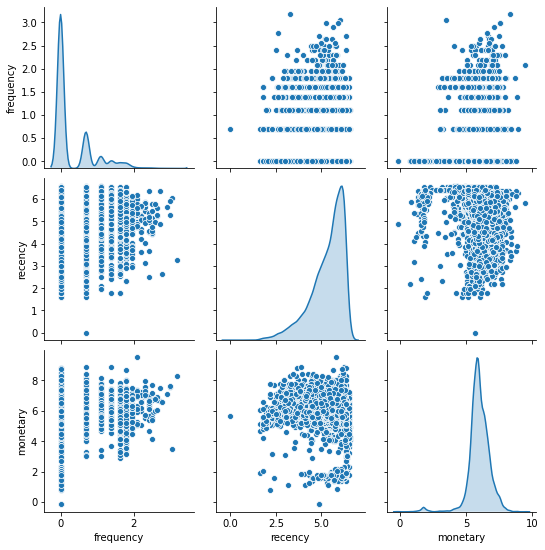

In [7]:
# Plotando um pairplot em escala logarítmica
colunas = df[['frequency', 'recency', 'monetary']]
sns.pairplot(data=np.log(colunas), diag_kind='kde')
plt.show()

- Heatmap

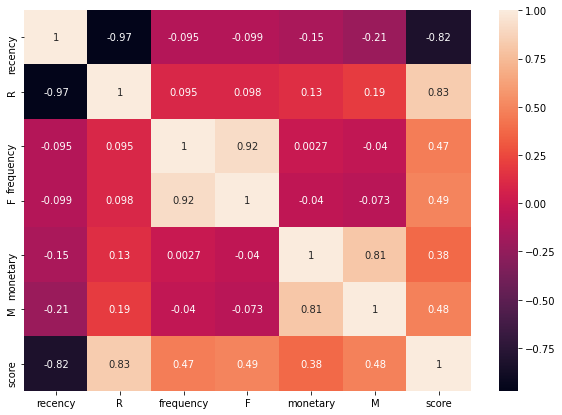

In [12]:
# Verificando a correlação das varáveis
fig = plt.figure(figsize=(10,7))
correlacao = df.corr()
sns.heatmap(data=correlacao, annot=True)
plt.show()

- Boxplot

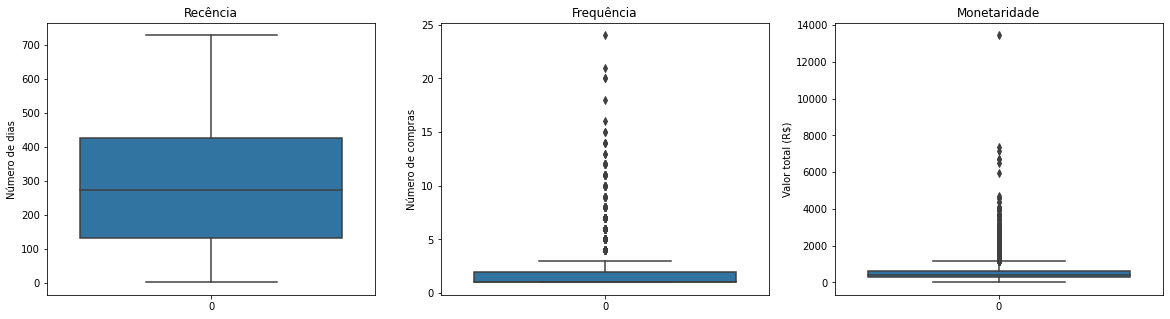

In [19]:
# Plotando um boxplot para as variáveis de interesse
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df['recency'])
plt.title('Recência')
plt.ylabel('Número de dias')
plt.subplot(1,3,2)
sns.boxplot(data=df['frequency'])
plt.title('Frequência')
plt.ylabel('Número de compras')
plt.subplot(1,3,3)
sns.boxplot(data=df['monetary'])
plt.title('Monetaridade')
plt.ylabel('Valor total (R$)')
plt.show()

Analisando o boxplot vemos que a recência não apresenta outliers, logo nossa análise ficará mais focada na frequência e na monetaridade. Tendo em vista que a melhor situação possível ocorre quando temos grandes frequência e monetaridade, podemos procurar aqueles clientes "ideais", ou seja, aqueles que compram muitas vezes e gastam muito.

## 3) Procurando os "melhores" clientes

Dos resultados acima, buscaremos encontrar aqueles clientes considerados ideais.

- Considerando a frequência

Considerando o boxplot, os outliers seriam aqueles com mais de duas compras. Neste caso, podemos selecionar estes clientes fazendo uma simples query no nosso dataframe.

In [22]:
df_freq = df.query('frequency > 2')
df_freq.head()

customer_unique_id  recency  R  ...  M  score  RFM_level
1   000fbf0473c10fc1ab6f8d2d286ce20c       39  4  ...  1      7      Ótimo
18  0064a1b5f5cddd047c987b988a90c8c1      186  3  ...  1      6      Ótimo
21  0085139b503668b3addcfe826d91be8d      216  2  ...  1      5  Muito bom
26  0096c18412349537abc45e350581cbbc      538  0  ...  2      4        Bom
27  0097fca0db567f5ca79509b7b4fc1c2d      137  3  ...  1      7      Ótimo

[5 rows x 9 columns]

In [23]:
df_freq.shape

(1368, 9)

In [24]:
df_freq['RFM_level'].value_counts()

Ótimo        855
Muito bom    223
Bom          181
Regular      109
Name: RFM_level, dtype: int64